<h1 style = "text-align: center; margin-top: 10px;">WINTER SEMESTER 2022 - 23</h1>
<h1 style = "text-align: center; margin-top: 10px;">MACHINE LEARNING</h1>
<h1 style = "text-align: center; margin-top: 10px;">CSE4020</h1>
<h1 style = "text-align: center; margin-top: 10px;">LAB ASSIGNMENT 4</h1>
<br><br>
<pre>
    <b>Name:               </b> Gaurav Navada 
    <b>Registration no.:   </b> 20BKT0128 
    <b>Date of submission: </b> 3/24/2023
    <b>Slot no.:           </b> L43 + L44 
    <b>Faculty Name:       </b> Prof. SUDHA.S
</pre>

# Question 1

Implement Hierarchical clustering

Random Data points for Clustering:
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]]


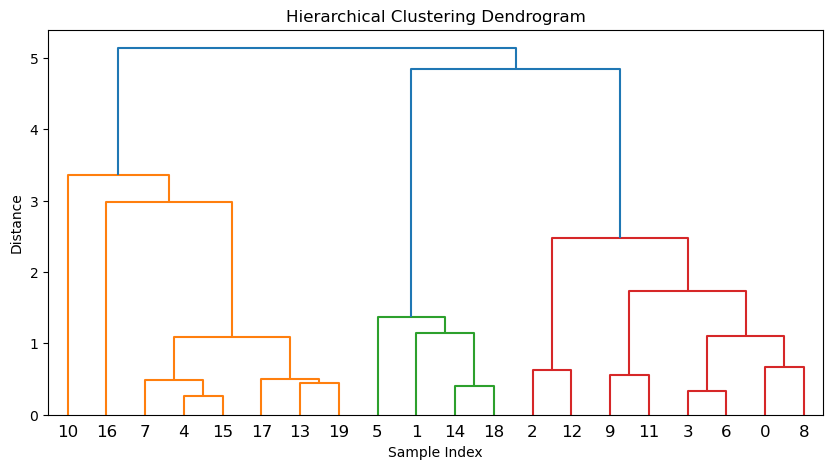

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate some sample data - 20 random points
np.random.seed(0)
X = np.random.randn(20, 2)
print("Random Data points for Clustering:")
print(X)

# Perform hierarchical clustering on the data
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()

# Question 2

Implement Gaussian Mixture Model Using the Expectation Maximization

### Code Explanation
In this example, we first generate some sample data 'X', then fit a Gaussian Mixture Model to the data using the 'GaussianMixture' function from 'sklearn.mixture'. We specify the number of components in the mixture using the 'n_components' parameter and the maximum number of iterations for the Expectation Maximization algorithm using the 'max_iter' parameter.<br>
Once the model is trained, we use the 'predict' method to assign each data point to one of the mixture components. We then plot the results using a scatter plot with different colors for each cluster.

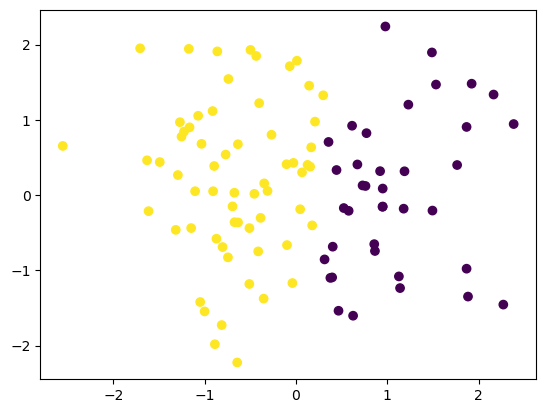

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate some sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Fit a Gaussian Mixture Model to the data using Expectation Maximization
gmm = GaussianMixture(n_components=2, max_iter=100)
gmm.fit(X)

# Predict the cluster assignments for the data
labels = gmm.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


# Question 3

Evaluating ML algorithm with balanced and unbalanced datasets

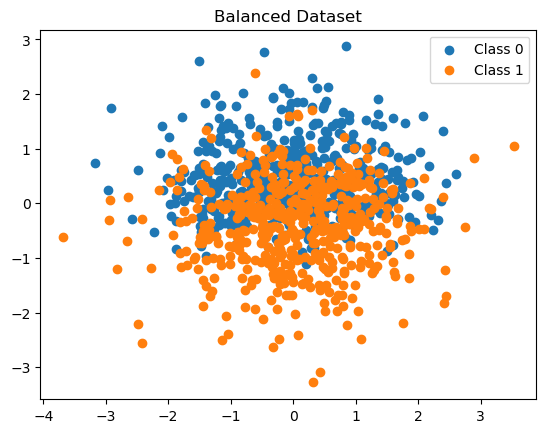

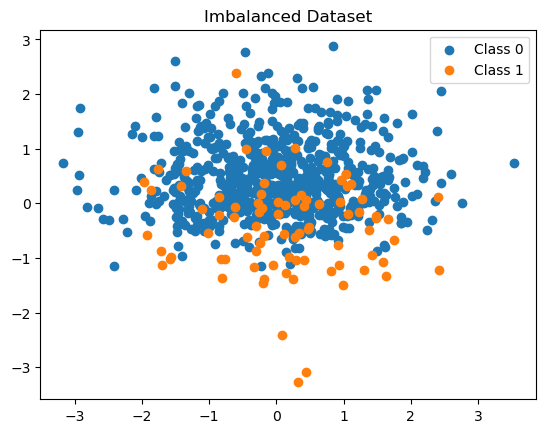

Metrics for the balanced dataset:
Accuracy: 0.855
F1 Score: 0.8557213930348259
Confusion Matrix:
 [[85  8]
 [21 86]]

Metrics for the imbalanced dataset:
Accuracy: 0.895
F1 Score: 0.3636363636363637
Confusion Matrix:
 [[173   7]
 [ 14   6]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Generate a balanced dataset
X_balanced, y_balanced = make_classification(n_samples=1000, n_classes=2, weights=[0.5, 0.5], random_state=42)

# Generate an imbalanced dataset
X_train_imbalanced, y_train_imbalanced = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_train_imbalanced, y_train_imbalanced, test_size=0.2, random_state=42)

# Train a logistic regression model on the balanced dataset
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the balanced dataset
y_pred_balanced = lr_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)
confusion_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

# Train a logistic regression model on the imbalanced dataset
lr_imbalanced = LogisticRegression(random_state=42)
lr_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)

# Evaluate the model on the imbalanced dataset
y_pred_imbalanced = lr_imbalanced.predict(X_test_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
f1_imbalanced = f1_score(y_test_imbalanced, y_pred_imbalanced)
confusion_matrix_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Plot the balanced dataset
plt.scatter(X_balanced[y_balanced==0, 0], X_balanced[y_balanced==0, 1], label='Class 0')
plt.scatter(X_balanced[y_balanced==1, 0], X_balanced[y_balanced==1, 1], label='Class 1')
plt.title('Balanced Dataset')
plt.legend()
plt.show()

# Plot the imbalanced dataset
plt.scatter(X_train_imbalanced[y_train_imbalanced==0, 0], X_train_imbalanced[y_train_imbalanced==0, 1], label='Class 0')
plt.scatter(X_train_imbalanced[y_train_imbalanced==1, 0], X_train_imbalanced[y_train_imbalanced==1, 1], label='Class 1')
plt.title('Imbalanced Dataset')
plt.legend()
plt.show()

# Print the evaluation metrics for the balanced dataset
print('Metrics for the balanced dataset:')
print('Accuracy:', accuracy_balanced)
print('F1 Score:', f1_balanced)
print('Confusion Matrix:\n', confusion_matrix_balanced)
print()

# Print the evaluation metrics for the imbalanced dataset
print('Metrics for the imbalanced dataset:')
print('Accuracy:', accuracy_imbalanced)
print('F1 Score:', f1_imbalanced)
print('Confusion Matrix:\n', confusion_matrix_imbalanced)


# Question 4

Implement K‐means Clustering. 

### Code Explanation
In the above code, we first generate a sample dataset using the 'make_blobs()' function from scikit-learn, which creates blobs of random points with a specified number of samples and centers. In this example, we are making 1000 sample points which has 4 centroids. We then fit a K-means clustering model on this data using the 'KMeans()' function from scikit-learn, and predict the cluster assignments for each data point using the 'fit_predict()' method. Finally, we plot the results by coloring the data points according to their assigned cluster.

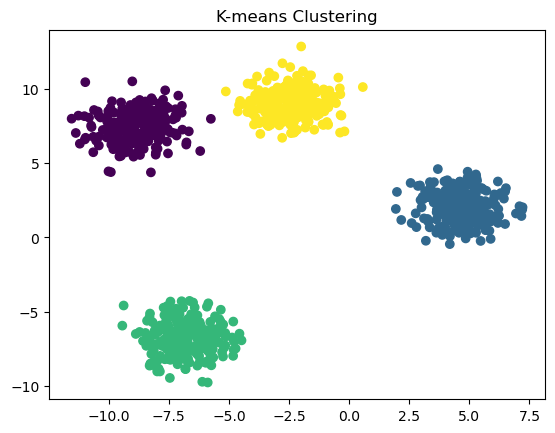

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

# Fit K-means model on data
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('K-means Clustering')
plt.show()



# Question 5

Implement K‐mode clustering.  

In [64]:
!pip install kmodes

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from sklearn.datasets import load_iris
from kmodes.kmodes import KModes

# Load the iris dataset
iris = load_iris()

# Convert the data to a pandas dataframe
import pandas as pd
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Convert the class labels to integers
y = iris.target

# Initialize the k-modes clustering model with 3 clusters
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

# Fit the model to the data
clusters = km.fit_predict(X)

# Print the cluster centroids
print(km.cluster_centroids_)

# Print the cluster labels
print(clusters)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 478.0
Run 1, iteration: 2/100, moves: 7, cost: 478.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 483.0
Run 2, iteration: 2/100, moves: 0, cost: 483.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15, cost: 467.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7, cost: 456.0
Best run was number 5
[[6.7 3.  4.5 1.8]
 [5.1 3.4 1.4 0.2]
 [6.1 2.8 4.  1.3]]
[1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 2 2 2 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2 0 2
 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2

# Question 6

Compare the performance of following Machine Learning algorithms for the “National
Institute of Diabetes and Digestive and Kidney Diseases” dataset available in the Kaggle
database.<br>
a. K-nearest neighbour classifier,<br>
b. Decision tree classifier,<br>
c. Support Vector Machine.<br>


### Code Explanation
This code loads the "National Institute of Diabetes and Digestive and Kidney Diseases" dataset, splits it into training and testing sets, initializes the K-nearest neighbor, Decision tree, and Support vector machine classifiers, trains them on the training set, tests them on the testing set, and calculates and prints their accuracy scores. You can use this code to compare the performance of these three algorithms on this dataset.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("D:\Winter_sem_22_23\ML\LAB\Assignment_4\diabetes.csv")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

# Initialize the classifiers
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svm = SVC()

# Train the classifiers
knn.fit(X_train, y_train)
dtc.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Test the classifiers and get the accuracy score
knn_acc = accuracy_score(y_test, knn.predict(X_test))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Print the accuracy scores
print('K-nearest neighbor classifier accuracy:', knn_acc)
print('Decision tree classifier accuracy:', dtc_acc)
print('Support vector machine accuracy:', svm_acc)


K-nearest neighbor classifier accuracy: 0.6883116883116883
Decision tree classifier accuracy: 0.696969696969697
Support vector machine accuracy: 0.7359307359307359


# Question 7

Implement Principle Component Analysis for Dimensionality Reduction.

### Code Explanation
In this example, we first load the <b>'wine' dataset</b> and then initialize a PCA model with 2 components. We then fit the data to the PCA model and transform it to the first two principal components. Finally, we plot the transformed data using the first two principal components as the x and y axis, respectively, and color each point based on its class label.

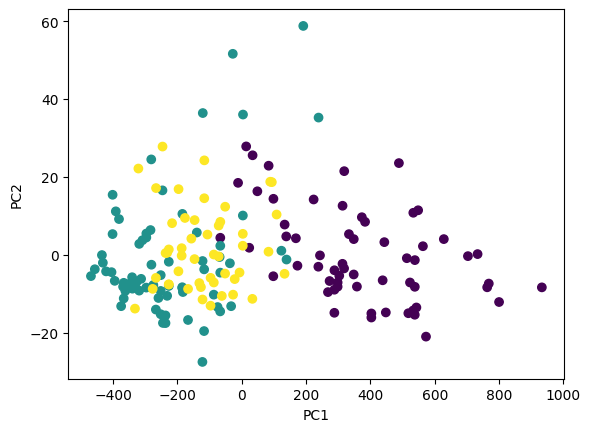

In [5]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine dataset
data = load_wine()

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit the data to the PCA model
pca.fit(data.data)

# Transform the data to the first two principal components
transformed_data = pca.transform(data.data)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=data.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
